In [2]:
import numpy as np
import pandas as pd

In [3]:
# Save both dataframes

df_words_similarities = pd.read_csv('words_similarities.csv', index_col=0)
df_words_similarities[df_words_similarities < 0] = 0
df_words_similarities[df_words_similarities > 1] = 1


df_locations_similarities = pd.read_csv('locations_similarities.csv', index_col=0)
df_locations_similarities[df_locations_similarities < 0] = 0
df_locations_similarities[df_locations_similarities > 1] = 1


In [4]:
df_words_similarities

,cap,chair,laptop,telephone,friend,pen,bed,candles,bicycle,towel,...,church,painting,family,toaster,jacuzzi,co-worker,fireworks,bus,table,kayak
cap,1.000000,0.451873,0.140494,0.053738,0.098347,0.386090,0.386629,0.161626,0.308096,0.453514,...,0.217772,0.271019,0.145068,0.000000,0.008371,0.000000,0.194758,0.168863,0.472065,0.099193
chair,0.451873,1.000000,0.210955,0.247424,0.434728,0.359311,0.525606,0.167576,0.310008,0.461875,...,0.403790,0.362432,0.331902,0.000000,0.207653,0.117542,0.100624,0.218297,0.591581,0.036818
laptop,0.140494,0.210955,1.000000,0.531405,0.294208,0.283672,0.393933,0.257776,0.394533,0.231717,...,0.043107,0.188707,0.271483,0.328033,0.153935,0.158578,0.155774,0.391456,0.298893,0.087473
telephone,0.053738,0.247424,0.531405,1.000000,0.417322,0.276439,0.338385,0.173888,0.292607,0.186202,...,0.301610,0.066239,0.470557,0.070951,0.000000,0.000000,0.237560,0.575778,0.360402,0.126917
friend,0.098347,0.434728,0.294208,0.417322,1.000000,0.328190,0.458468,0.127259,0.178780,0.168393,...,0.409786,0.406011,0.723304,0.004958,0.000000,0.504027,0.014036,0.296119,0.297514,0.000000
pen,0.386090,0.359311,0.283672,0.276439,0.328190,1.000000,0.237707,0.251801,0.301964,0.407726,...,0.167289,0.460042,0.160623,0.319559,0.141403,0.000000,0.225857,0.130414,0.394255,0.192053
bed,0.386629,0.525606,0.393933,0.338385,0.458468,0.237707,1.000000,0.448159,0.354419,0.575243,...,0.309688,0.326196,0.490181,0.171863,0.418794,0.095526,0.218258,0.469835,0.560586,0.271665
candles,0.161626,0.167576,0.257776,0.173888,0.127259,0.251801,0.448159,1.000000,0.129205,0.412263,...,0.354531,0.374309,0.235631,0.311752,0.296862,0.000000,0.593376,0.264296,0.346530,0.000000
bicycle,0.308096,0.310008,0.394533,0.292607,0.178780,0.301964,0.354419,0.129205,1.000000,0.257100,...,0.106924,0.219890,0.190977,0.075992,0.180810,0.000000,0.381515,0.727732,0.336767,0.542000
towel,0.453514,0.461875,0.231717,0.186202,0.168393,0.407726,0.575243,0.412263,0.257100,1.000000,...,0.034414,0.225638,0.102677,0.311565,0.400311,0.045735,0.338400,0.132507,0.506260,0.168945


Load the states of the environment

In [5]:
df_env_states = pd.read_csv('environment_states.csv', index_col=0)
df_env_novel_states = pd.read_csv('environment_novel_states.csv', index_col=0)
# Select 5 rows
df_env_novel_states = df_env_novel_states.sample(5)

Tune the similarity matrix to fit to the novel episode semantics

In [6]:
df_words_similarities_tuned = df_words_similarities.copy()

# for word in df_env_novel_states['word'].unique():
#     sim = 1
#     # Add 1 and divide by 2 to the column of the word
#     df_words_similarities_tuned[word] = sim
#     # Add 1 and divide by 2 to the index of the word
#     df_words_similarities_tuned.loc[word] = sim


df_words_similarities_tuned = df_words_similarities_tuned

In [7]:
from sklearn.manifold import MDS
mds = MDS(n_components=1, dissimilarity='precomputed', random_state=0)
semantic_mds = mds.fit_transform(df_words_similarities_tuned).reshape(-1)

mds = MDS(n_components=1, dissimilarity='precomputed', random_state=0)
spatial_mds = mds.fit_transform(df_locations_similarities).reshape(-1)

# Scale time to be between 0 and 1
df_env_states['time'] = df_env_states['time'] / df_env_states['time'].max()

# Scale semantic_mds to be between 0 and 1
# semantic_mds = (semantic_mds - semantic_mds.min()) / (semantic_mds.max() - semantic_mds.min())
df_semantic_mds = pd.DataFrame({'semantic_mds': semantic_mds}, index=df_words_similarities_tuned.index)

df_spatial_mds = pd.DataFrame({'spatial_mds': spatial_mds}, index=df_locations_similarities.index)

In [8]:
from environments_episodic import EpisodicGraph
from environments import RoomWorld
from generators import Generator
from propagators import Propagator
from simulators_episodic import EpisodicSimulator 


# Create the environment
k = 1  # Inter-episode connectivity. Domain: [0, 1]. 1, sample across episodes. 0, sample within episodes
m = 0  # Semantic Similarity weight. Domain: [0, inf]. 0, no action dependence.
n = 0  # Temporal Similarity weight. Domain: [0, inf]. 0, no time dependence.
o = 0  # Spatial Similarity weight. Domain: [0, inf]. 0, no spatial dependence.

models = {
    "Episodic Inference": (0, 0, 0),
    "Episodic Inference\nsemantic-biased": (2, 0, 0),
    "Episodic Inference\ntemporal-biased": (0, 2, 0),
    "Episodic Inference\nspatial-biased": (0, 0, 2),
    # "semantic-temporal-biased": (1, 1, 0),
    # "semantic-spatial-biased": (1, 0, 1),
    # "temporal-spatial-biased": (0, 1, 1),
    # "semantic-temporal-spatial-biased": (1, 1, 1),
}

n_step = 40
n_samp = 40
seqs_score = {}
for model, params in models.items():
    k = 1
    m, n, o = params
    env = EpisodicGraph(df_env_states, df_words_similarities_tuned, df_semantic_mds, df_locations_similarities,
                        df_spatial_mds, k=k, m=m, n=n, o=o)
    # env = RoomWorld()

    # Create the generator
    generator = Generator(env)

    # Create the propagator
    propagator = Propagator(generator)
    # propagator.min_zero_cf()

    # Create the simulator

    # random init state
    init_state = np.random.randint(0, len(env.states))
    simulator = EpisodicSimulator(propagator, init_state)

    # Simulate
    simulator.sample_sequences(n_step=n_step, n_samp=n_samp)

    seqs_score[model] = simulator.state_seqs


GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
GENERATOR: generator constructed from environment transition matrix with jump_rate 15.00
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: algebraic multiplicity > 1.
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
GENERATOR: generator constructed from environment transition matrix with jump_rate 15.00
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: algebraic multiplicity > 1.
EIGENSPECTRUM: complex eigenvalues: [-15.36970792+9.93013661e-16j -15.36970792-9.93013661e-16j]
PROPAGATOR: squashing imaginar

In [9]:
def episodic_rl_algorithm(df_env_states, df_env_novel_states, max_seqs = 40, n_samp=50, thresh=0.4):
    seqs = np.zeros((n_samp, max_seqs), dtype=int)

    for i in range(n_samp):
        seqs_i = []

        # Group df_env_states by location
        df_env_states_2 = df_env_states.copy()
        
        # Add a id column to df_env_states_2
        df_env_states_2['id'] = np.arange(len(df_env_states_2))
        df_env_states_by_location = df_env_states_2.groupby('episode')

        random_group_id = 0
        while len(seqs_i) < max_seqs and random_group_id < df_env_states['episode'].max():
            # Get random group
            random_group = df_env_states_by_location.get_group(random_group_id)
            random_group_id += 1
            
            # Get random_row
            random_row = random_group.sample(n=1)
            seqs_i.append(random_row['id'].values[0])

            # Eval each word from df_env_novel_states with the random_row
            sim_max = 0
            for word in df_env_novel_states['word'].unique():
                # Get the similarity between the word and the random_row
                sim = df_words_similarities.loc[word, random_row['word'].values[0]]
                if sim > sim_max:
                    sim_max = sim
            
            if sim_max > thresh:
                random_rows = random_group.sample(frac=0.9, replace=False)
                [seqs_i.append(i) for i in random_rows['id'].values]

        seqs[i] = np.array(seqs_i)[:max_seqs]
    return seqs
episodic_rl_label = "Episodic RL"
rl_thresh = 0.4
seqs_score[episodic_rl_label] = episodic_rl_algorithm(df_env_states, df_env_novel_states, max_seqs=n_step,
                                                   n_samp=n_samp, thresh=rl_thresh)

In [10]:
def create_df_sequences(seqs):
    df_sequences = pd.DataFrame()
    for i in range(seqs.shape[0]):
        df_i = df_env_states.iloc[seqs[i, :]]
        # Append a column with the sequence number
        df_i["seq"] = i
        df_sequences = pd.concat([df_sequences, df_i], ignore_index=True)
    return df_sequences

In [11]:
# Create a pandas dataframe with the states sequence

df_sequences = pd.DataFrame()
for model, seqs in seqs_score.items():
    df_sequences_i = create_df_sequences(seqs)
    df_sequences_i["model"] = model

    df_sequences = df_sequences.append(df_sequences_i, ignore_index=True)


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_environment(df_env_states, words_sorted, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 5))

    colors = ["r", "b"] * (len(df_env_states["episode"].unique()) // 2 + 1)

    from matplotlib.patches import Rectangle

    rectangle_height = len(df_env_states["word"].unique())
    i_prev = 0
    for c, i in zip(colors, [10] * len(df_env_states["episode"].unique())):
        rect = Rectangle((i_prev - 0.5, - 0.5), i, rectangle_height + 0.5, linewidth=1, facecolor=c, alpha=0.05)
        ax.add_patch(rect)
        # Plot locations name at the center of the rectangle
        label_i = df_env_states.loc[i_prev]["episode"]
        label = f"Ep. {label_i}"
        ax.text(i_prev + i / 2, rectangle_height - 3, label, fontsize=9, ha='center', alpha = 0.5, color=c)

        i_prev += i

    # set limits
    ax.set_xlim(-1, len(df_env_states))
    ax.set_ylim(len(df_env_states["word"].unique()) - 0.5, -0.5)

    for i, row in df_env_states.iterrows():
        ax.scatter(row['time'] * (len(df_env_states) - 1), words_sorted[row['word']], color='k', s=50, alpha=0.2)

    # Shuffle y axis
    ax.set_yticks(np.arange(len(words_sorted.keys())))
    # Set words_sampled in reverse order
    ax.set_yticklabels(words_sorted.keys())

    return ax


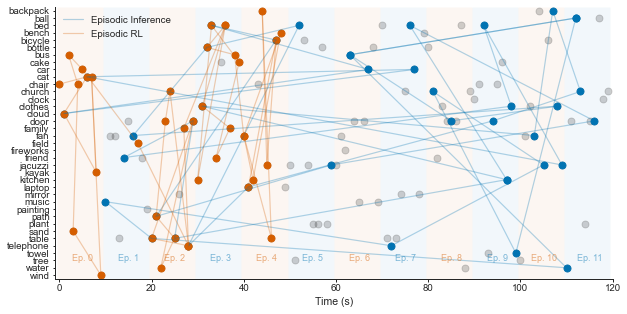

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

# Extract the unique words from the sampled df
words_sorted = df_env_states['word'].unique()
# Order it alphabetically
words_sorted.sort()
# Create a dict with the index of each word
words_sorted = {word: i for i, word in enumerate(words_sorted)}

plot_environment(df_env_states, words_sorted, ax=ax)

# plot the df_sequences

# extrat model "Episodic Inference" and "Episodic RL"
df_sequences_2 = df_sequences[df_sequences['model'].isin(["Episodic Inference", episodic_rl_label])].groupby('model')
for c, (name, df_sequences_i) in zip(["b", "r"], df_sequences_2):
    # reset index
    df_sequences_i = df_sequences_i.reset_index(drop=True)
    df_sequences_i = df_sequences_i.groupby('seq')

    # Extract fir
    for seq_i, df_sequences_seq_i in df_sequences_i:
        for i, row in df_sequences_seq_i.iterrows():
            ax.scatter(row['time'] * (len(df_env_states) - 1), words_sorted[row['word']], color=c, s=50, alpha=1)
            # add lines conecting the points
            if i > 0:
                if i == 1:
                    ax.plot([df_sequences_seq_i.iloc[i - 1]['time'] * (len(df_env_states) - 1), row['time'] * (len(df_env_states) - 1)],
                            [words_sorted[df_sequences_seq_i.iloc[i - 1]['word']], words_sorted[row['word']]], color=c, alpha=0.3, label=name)
                else:
                
                    ax.plot([df_sequences_seq_i.iloc[i - 1]['time'] * (len(df_env_states) - 1), row['time'] * (len(df_env_states) - 1)],
                            [words_sorted[df_sequences_seq_i.iloc[i - 1]['word']], words_sorted[row['word']]], color=c, alpha=0.3)
        break
ax.legend()
# set x label
ax.set_xlabel("Time (s)")
plt.show()

In [36]:
# save as pdf
fig.savefig("sampling.pdf", bbox_inches="tight")

In [14]:
# compute the evaluation

def compute_evaluation(df_sequences, df_env_novel_states):
    # Group_by model
    df_sequences_by_model = df_sequences

    # To each unique word of the model apply the semantic similarity to the novel words and get the mean
    df_sequences_by_model = df_sequences_by_model.groupby(['model', 'seq'])

    df_final = pd.DataFrame()
    # iterate over the groups
    for seq_i, df_seq_i in df_sequences_by_model:
        # iterate over rows
        reward = 0
        # remove duplicated rows
        df_seq_i = df_seq_i.drop_duplicates(subset=['word', 'location'])
        for i, row in df_seq_i.iterrows():
            # iterate over the novel words
            for j, novel_row in df_env_novel_states.iterrows():
                # Get the semantic and spatial similarity
                semantic_sim = df_words_similarities.loc[row['word'], novel_row['word']]
                spatial_sim = df_locations_similarities.loc[row['location'], novel_row['location']]
                # Compute the reward
                reward += semantic_sim + spatial_sim

        # Compute the mean reward
        # reward = reward / (len(df_seq_i) * len(df_env_novel_states))

        # Append the reward to the df_final
        df_final = df_final.append({'model': df_seq_i['model'].values[0], 'seq': seq_i, 'reward': reward},
                                   ignore_index=True)

    # Compute the mean reward for each seq_i
    df_sequences_by_model_sim = df_final.groupby(['model', 'seq']).mean().reset_index()

    return df_sequences_by_model_sim

df_eval = compute_evaluation(df_sequences, df_env_novel_states)


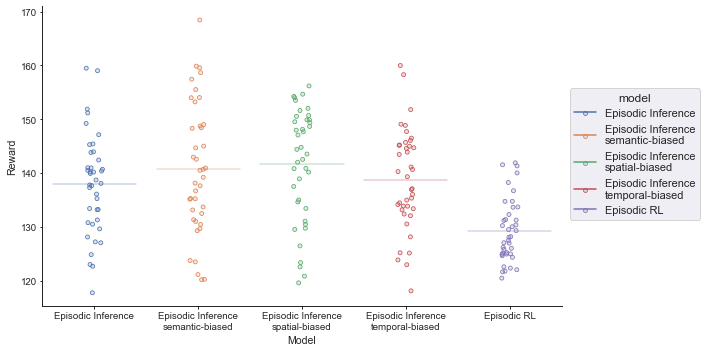

In [24]:
import seaborn.objects as so

fig, ax = plt.subplots(figsize=(8, 5))
p = (
    so.Plot(df_eval, x="model", y="reward", color="model")
    .add(so.Dash(alpha=0.3), so.Agg())
    .add(so.Dots(), so.Jitter())
    .label(
        x="Model",
        y="Reward",
    )
    .layout(
        engine="tight",
    )
    .on(ax)
    .plot()
)


In [27]:
# save as pdf
fig.savefig("evaluation.pdf", bbox_inches="tight")

# Autocorrelation

In [16]:
df_env_states_numpy = df_env_states.copy()

df_env_states_numpy["word"] = df_env_states_numpy["word"].apply(lambda x: df_semantic_mds.loc[x][0])
df_env_states_numpy["location"] = df_env_states_numpy["location"].apply(lambda x: df_spatial_mds.loc[x][0])

df_env_states_numpy = df_env_states_numpy.to_numpy().astype(np.float32)

In [17]:
from environments_episodic import EpisodicGraph
from environments import RoomWorld
from generators import Generator
from propagators import Propagator
from simulators_episodic import EpisodicSimulator

# Create the environment
k = 1  # Inter-episode connectivity. Domain: [0, 1]. 1, sample across episodes. 0, sample within episodes
m = 0  # Semantic Similarity weight. Domain: [0, inf]. 0, no action dependence.
n = 0  # Temporal Similarity weight. Domain: [0, inf]. 0, no time dependence.
o = 0  # Spatial Similarity weight. Domain: [0, inf]. 0, no spatial dependence.

models = {
    "Episodic Inference": (0, 0, 0),
    "Episodic Inference\nsemantic-biased": (12, 0, 0),
    "Episodic Inference\ntemporal-biased": (0, 12, 0),
    "Episodic Inference\nspatial-biased": (0, 0, 12),
    # "semantic-temporal-biased": (1, 1, 0),
    # "semantic-spatial-biased": (1, 0, 1),
    # "temporal-spatial-biased": (0, 1, 1),
    # "semantic-temporal-spatial-biased": (1, 1, 1),
}

n_step = 40
n_samp = 40
seqs_auto = {}
for model, params in models.items():
    k = 1
    m, n, o = params
    env = EpisodicGraph(df_env_states, df_words_similarities_tuned, df_semantic_mds, df_locations_similarities,
                        df_spatial_mds, k=k, m=m, n=n, o=o)
    # env = RoomWorld()

    # Create the generator
    generator = Generator(env)

    # Create the propagator
    propagator = Propagator(generator)
    # propagator.min_zero_cf()

    # Create the simulator

    # random init state
    init_state = 0
    simulator = EpisodicSimulator(propagator, init_state)

    # Simulate
    simulator.sample_sequences(n_step=n_step, n_samp=n_samp)

    seqs_auto[model] = simulator.state_seqs

seqs_auto[episodic_rl_label] = episodic_rl_algorithm(df_env_states, df_env_novel_states, max_seqs=n_step,
                                                     n_samp=n_samp, thresh=0.4)

GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
GENERATOR: generator constructed from environment transition matrix with jump_rate 15.00
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: algebraic multiplicity > 1.
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
GENERATOR: generator constructed from environment transition matrix with jump_rate 15.00
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: algebraic multiplicity > 1.
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (120, 120) .
GE

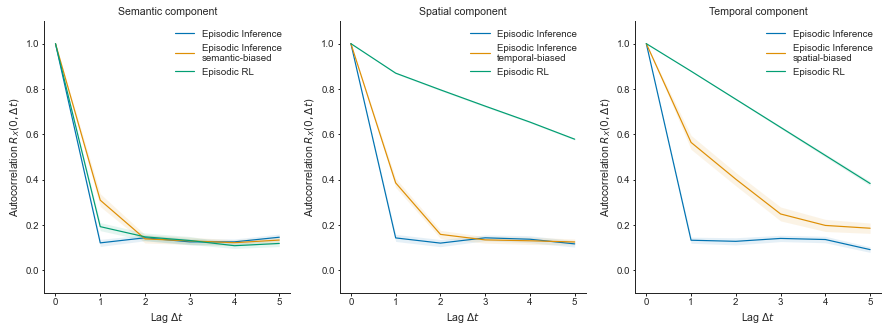

In [28]:
from autocorrelation import estimate_episodic_acf_v2
import seaborn as sns

lags = np.arange(0, 6)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
color = sns.color_palette()

for i, comp in enumerate(["Semantic", "Spatial", "Temporal"]):
    for m_i, (model, seqs) in enumerate(seqs_auto.items()):
        if m_i not in [0, i + 1, 4]:
            continue
        samps_state = df_env_states_numpy[seqs]
        acf_mean, acf_sem = estimate_episodic_acf_v2(samps_state, axis=(0, 1, 2))
        # plot mean
        ax[i].plot(lags, acf_mean[lags, i], label=model)
        ax[i].fill_between(lags, acf_mean[lags, i] - acf_sem[lags, i], acf_mean[lags, i] + acf_sem[lags, i],
                         alpha=0.1)

    # add legend
    ax[i].legend()

    # add labels
    ax[i].set_xlabel("Lag $\Delta t$")
    ax[i].set_ylabel("Autocorrelation $R_X(0, \Delta t)$")
    ax[i].set_title(f"{comp} component")
    # set y limits
    ax[i].set_ylim(-0.1, 1.1)

plt.show()

In [29]:
# save as pdf
fig.savefig("autocorrelation.pdf", bbox_inches="tight")

In [ ]:
sns.color_palette()
